# **Credit Card Customer churn Analysis - Extract**

## Objectives

* By the end of the extraction phase, I will:
    1. Load and extract the data
    2. Review to check the different variables
    3. Check for missing data and duplicate data
    4. Plot basic visualizatons to check how data is distributed
    5. Formulate questions for the transformation stage

## Inputs

* [Task outline](https://docs.google.com/document/d/1zF5axWut2MPIML3GppVsrWcl8ttD-fNuTYF0OpX4K9c/pub#h.6ugdhc7iwuaa)
* [Source data ](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data)   

## Outputs

* Overview of the dataset
* Basic visuals
* Baseline for transformation

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

importing libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import scipy
import scipy.stats as stats

installing required libraries and rerunning the requirements file.

In [ ]:
pip install matplotlib seaborn pingouin

# Data load

manually downloaded the dataset

In [ ]:
df = pd.read_csv("../../data/BankChurners.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

**Kaggle reveals that the Naive_Bayes_Classifier column can be dropped.**

Before doing that, I want to explore the data further.

In [18]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

**The dataset does not have any missing values.**

In [22]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [23]:
duplicates = df[df.duplicated()]

if len(duplicates)>0:
    print("Duplicate rows:")
    display(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


**The dataset does not have any duplicate values.**

code-inspiration: GitHub CoPilot

---

# Normality Test #

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 16))
for col in df1.columns:
    sns.histplot(df1[col], kde=True, ax=axes.flatten()[0])

**The warning says that the normality analysis may not be accurate. I am progressing with checking a random sample of 5000 rows.**

Code inspired by GitHub.

In [32]:
sample_size = 5000
df_sample = df.sample(n=sample_size, random_state=42)
pg.normality(df_sample, alpha=0.05)

,W,pval,normal
CLIENTNUM,0.744996,2.884491e-66,False
Customer_Age,0.996285,6.866062e-10,False
Dependent_count,0.936545,7.276401e-42,False
Months_on_book,0.977324,1.625092e-27,False
Total_Relationship_Count,0.919726,1.385631e-45,False
Months_Inactive_12_mon,0.871270,1.485582e-53,False
Contacts_Count_12_mon,0.928163,8.303331e-44,False
Credit_Limit,0.739215,1.046277e-66,False
Total_Revolving_Bal,0.916620,3.353601e-46,False
Avg_Open_To_Buy,0.742889,1.988964e-66,False


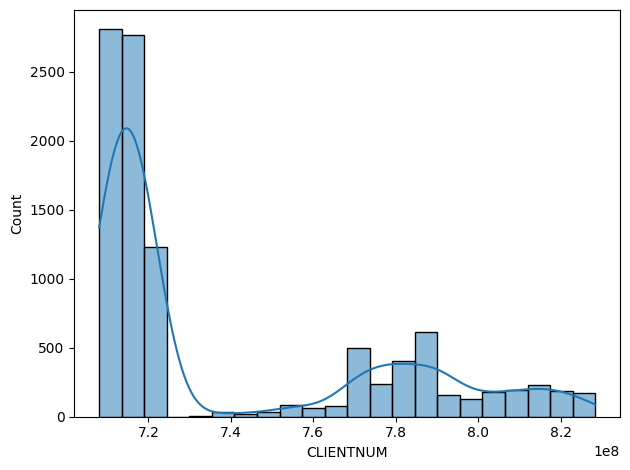

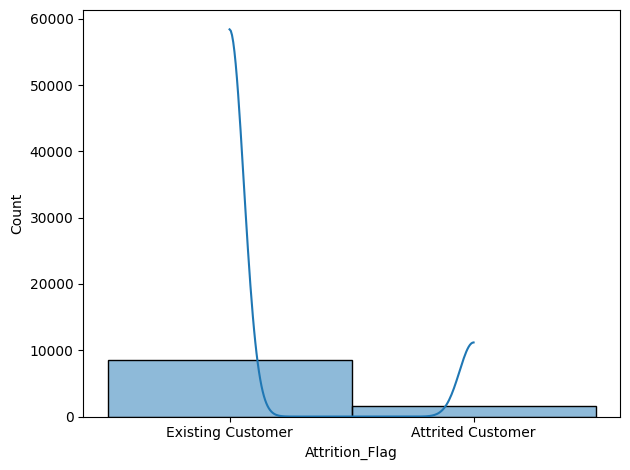

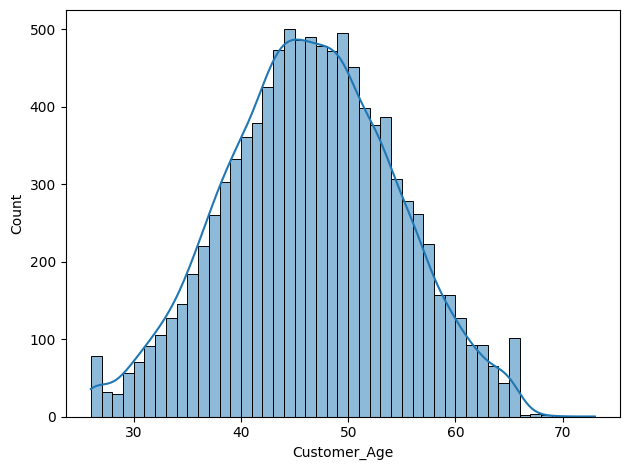

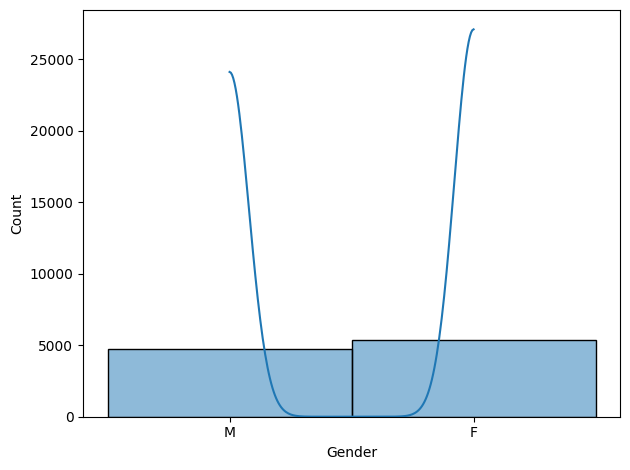

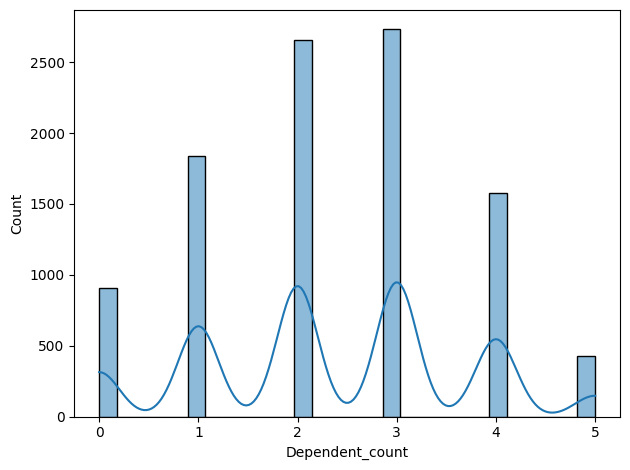

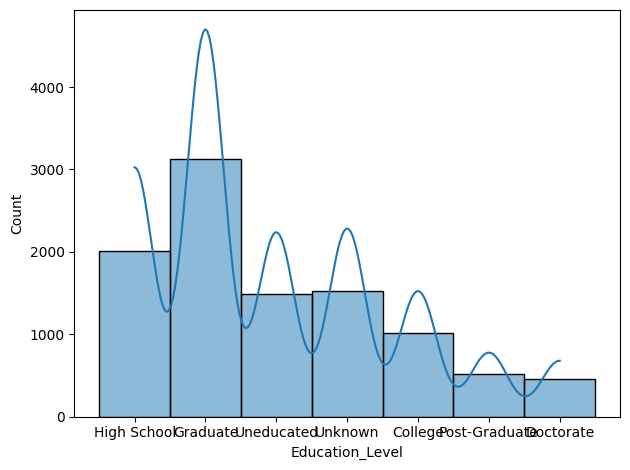

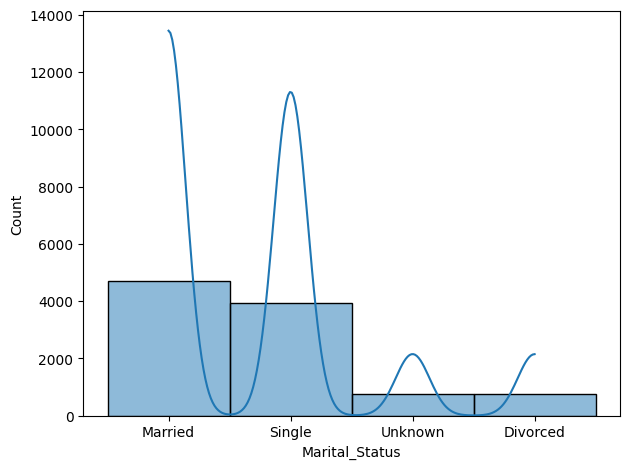

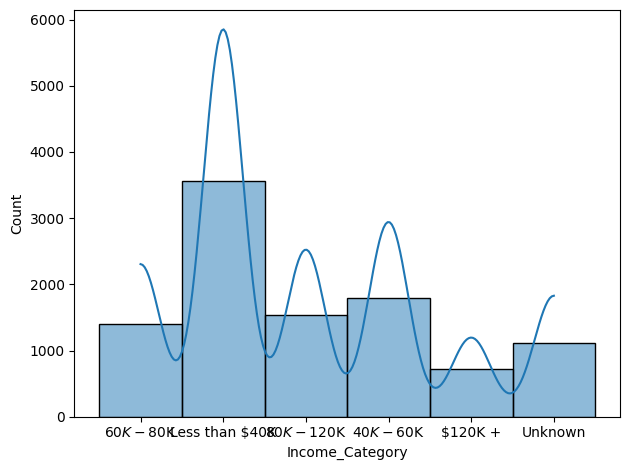

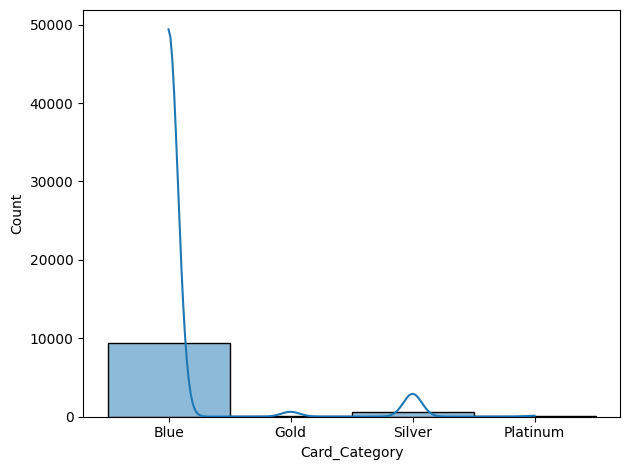

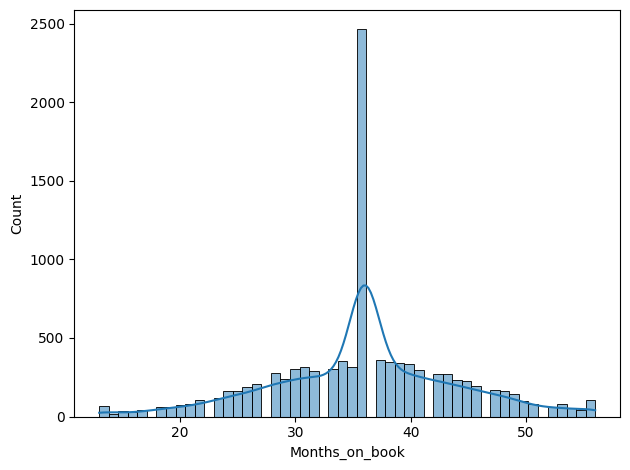

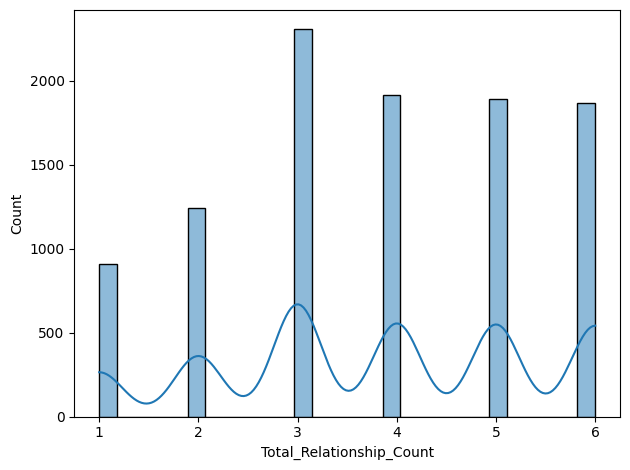

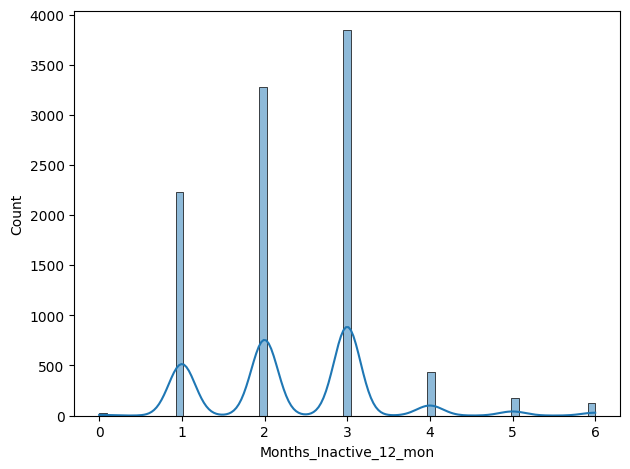

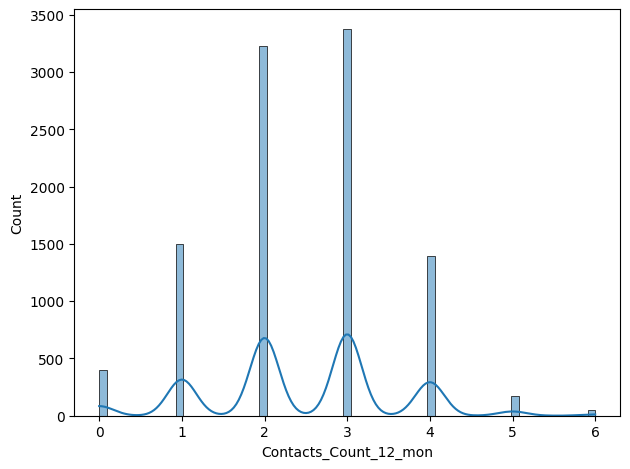

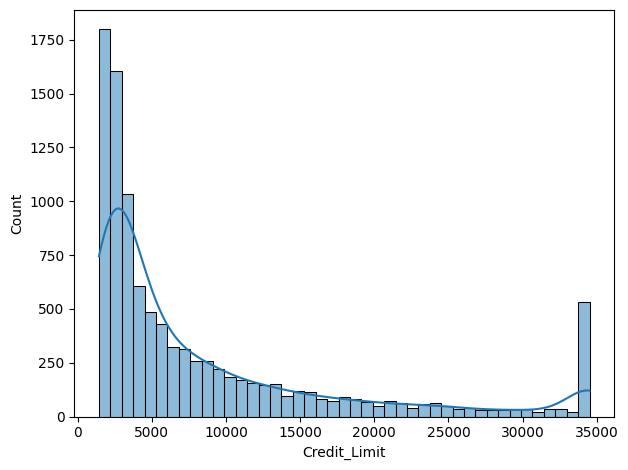

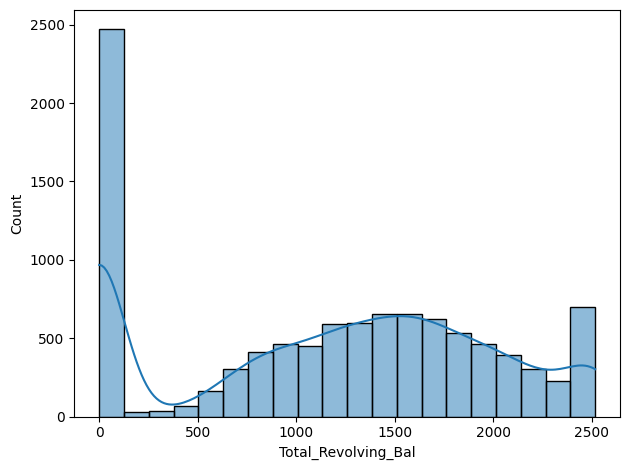

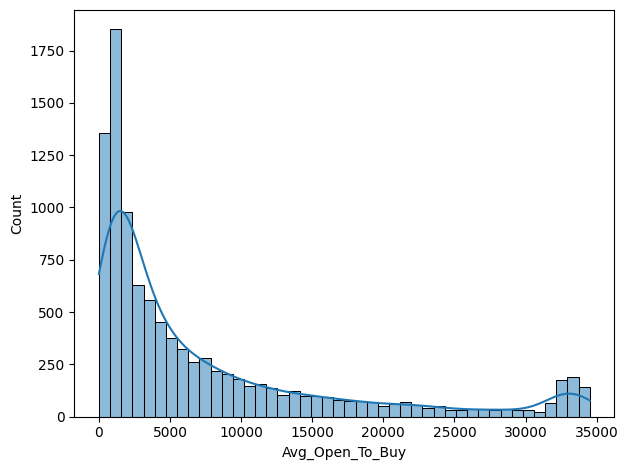

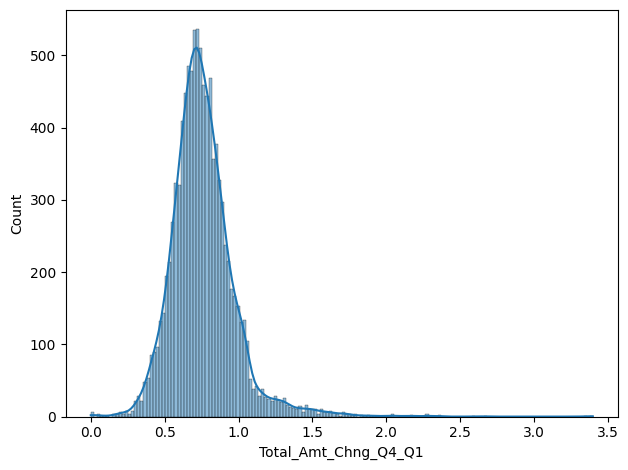

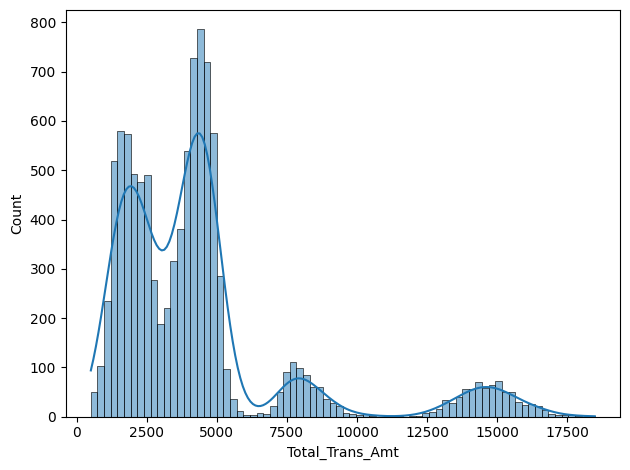

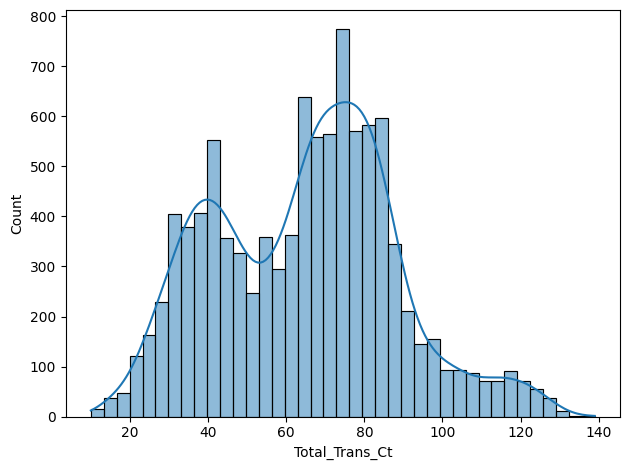

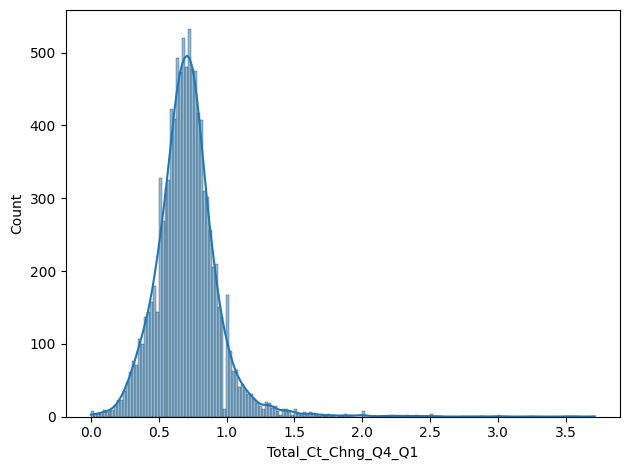

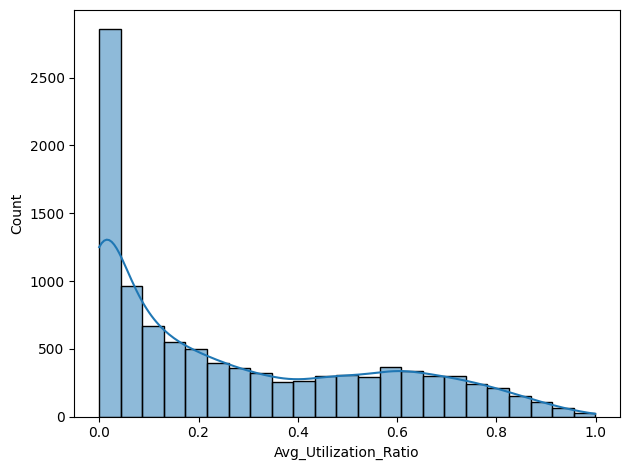

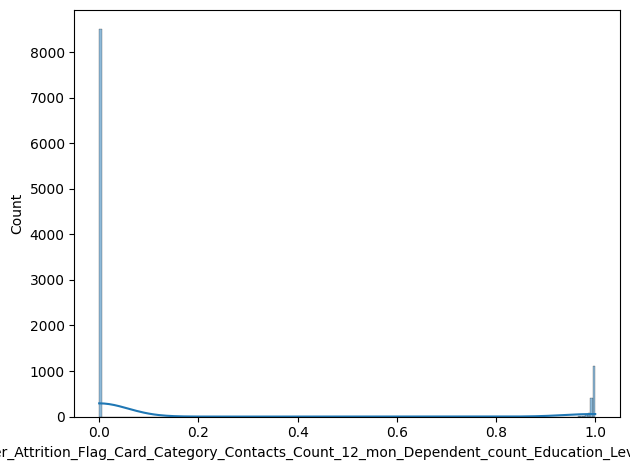

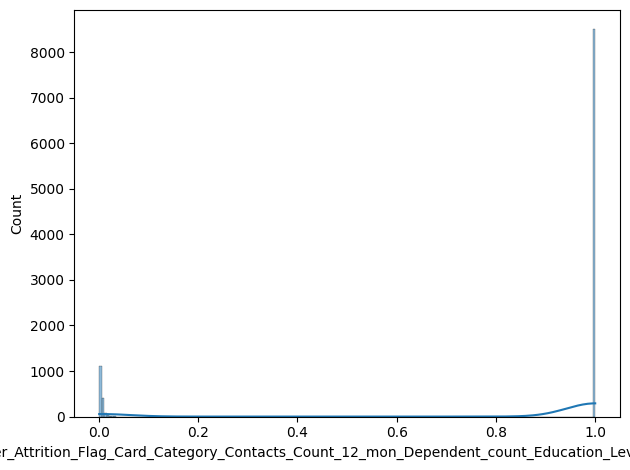

In [45]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.show()